In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings

warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    silhouette_score,
    davies_bouldin_score,
    normalized_mutual_info_score,
)


## Loading Training Data

In [ ]:
X_train = pd.read_csv(
    "/home/samir-dahal/Diabetes_Classification/data/processed/X_train_original.csv"
)
y_train = pd.read_csv(
    "/home/samir-dahal/Diabetes_Classification/data/processed/y_train_original.csv"
)["CLASS_encoded"]

# Train k-means clustering 

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(X_train)

In [10]:
pd.Series(clusters).value_counts().sort_index()

0     14
1    188
2    566
Name: count, dtype: int64

##  Evaluate on Training Data

In [11]:
ari = adjusted_rand_score(y_train, clusters)
silhouette = silhouette_score(X_train, clusters)
davies_bouldin = davies_bouldin_score(X_train, clusters)
nmi = normalized_mutual_info_score(y_train, clusters)

In [12]:
metrics = {
    "Algorithm": "K-Means",
    "ARI": ari,
    "Silhouette": silhouette,
    "Davies_Bouldin": davies_bouldin,
    "NMI": nmi,
    "Inertia": kmeans.inertia_,
}

In [13]:
metrics

{'Algorithm': 'K-Means',
 'ARI': 0.5558749464940614,
 'Silhouette': 0.17306756326942915,
 'Davies_Bouldin': 1.5861679535881128,
 'NMI': 0.43646848200216354,
 'Inertia': 6763.99017495972}

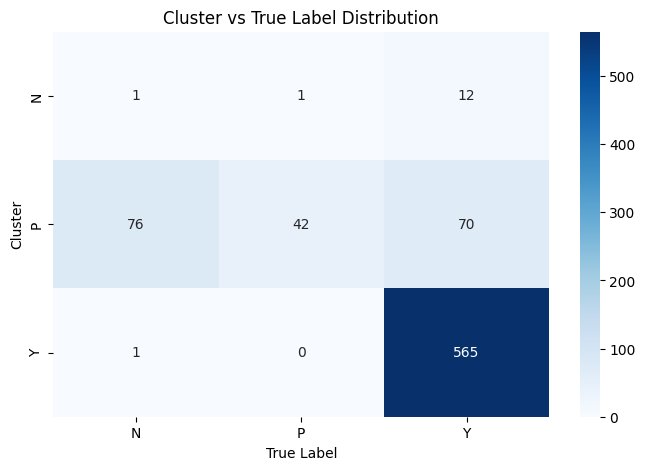

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create mapping for labels
label_map = {0: "N", 1: "P", 2: "Y"}

# Apply mapping
cluster_label_df = pd.DataFrame(
    {
        "Cluster": pd.Series(clusters).map(label_map),
        "True_Label": y_train.map(label_map),
    }
)

# Pivot for heatmap
heatmap_data = pd.crosstab(cluster_label_df["Cluster"], cluster_label_df["True_Label"])

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Cluster vs True Label Distribution")
plt.xlabel("True Label")
plt.ylabel("Cluster")
plt.show()
